In [271]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
from skimage import data as skimageData
import numpy as np
import matplotlib.image as mpimg

tf.logging.set_verbosity(tf.logging.INFO)



In [272]:
# Create a function to load the data
import PIL.Image as im
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if (f.endswith(".png") or f.endswith(".jpg"))]
        for f in file_names:
            #images.append(skimageData.imread(f))  ##leaving this option for modifications later!
            images.append(im.open(f, 'r').convert("RGB"))
            labels.append(d)
    return imagesNew, labels
tf.logging.set_verbosity(tf.logging.INFO)

In [273]:
ROOT_PATH = "/Users/nimishasharath/Documents/UW/AI/image-processing-shenanigans/Pokemon/data"
train_data_directory = os.path.join(ROOT_PATH, "Train")
test_data_directory = os.path.join(ROOT_PATH, "Test")

# load the data into training and testing directories
images, labels = load_data(train_data_directory)

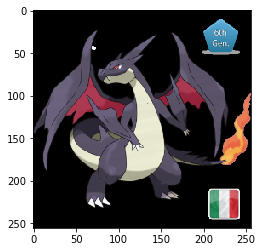

In [274]:
# Lets explore the data we have !
import matplotlib.pyplot as plt 
from skimage import transform 

# Rescale the images in the `images` array to 200X200 
images200 = [transform.resize(np.array(image), (256, 256)) for image in images]
plt.imshow(images200[56])
plt.show()


### Input Layer


In [275]:
input_layer = tf.reshape(features["x"], [-1, 256, 256, 1])


In [279]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


TypeError: Invalid dimensions for image data